In [6]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/bf/45/c961e3cb6ddad76b3

In [11]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install ImageDataGenerator

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ImageDataGenerator (from versions: none)
ERROR: No matching distribution found for ImageDataGenerator


In [17]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install keras --upgrade

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/48/a6/ac5cc97a2677e07d3ac359d05cfb2974ec16c8c8ae6dd265e94706256608/keras-3.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/8f/db/e05a35451d4ba30fdc65ef168dfdc68a6939ea6afdc0101e3e77f97e1547/optree-0.11.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------- --------------------- 20.5/46.2 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 571.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.1 MB 3.2 MB/s eta 0:00:01
   -------- ------------------------------- 0.2/1.1 MB 2.8 MB/s eta 0:00:01
   ---------------- ----------------------- 0.5/1.1 MB 3.5 MB/s eta 0:00:01
   ------------------------- -------------- 0.7/1.1 MB 4.0 MB/s eta 0

In [9]:
pip install -U tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import keras 
print(keras.__version__)

2.15.0


In [75]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import itertools
import random

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
import urllib.request

url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"
filename = "helper_functions.py"
urllib.request.urlretrieve(url, filename)

# 다운로드한 파일이 현재 디렉토리에 존재하는지 확인
import os
print(os.listdir('.'))

# helper_functions.py 파일을 임포트
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot


['.git', 'Data_Collection', 'helper_functions.py', 'input', 'README.md', 'thermal_image_detection_CNN.ipynb']


In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = (300, 300)

In [54]:
dataset = "input/plantstressidentification"
walk_through_dir(dataset)

There are 1 directories and 0 images in 'input/plantstressidentification'.
There are 3 directories and 0 images in 'input/plantstressidentification\Dataset'.
There are 5 directories and 0 images in 'input/plantstressidentification\Dataset\test'.
There are 0 directories and 48 images in 'input/plantstressidentification\Dataset\test\Blast'.
There are 0 directories and 44 images in 'input/plantstressidentification\Dataset\test\BLB'.
There are 0 directories and 47 images in 'input/plantstressidentification\Dataset\test\healthy'.
There are 0 directories and 43 images in 'input/plantstressidentification\Dataset\test\hispa'.
There are 0 directories and 40 images in 'input/plantstressidentification\Dataset\test\leaf_spot'.
There are 5 directories and 0 images in 'input/plantstressidentification\Dataset\train'.
There are 0 directories and 328 images in 'input/plantstressidentification\Dataset\train\Blast'.
There are 0 directories and 308 images in 'input/plantstressidentification\Dataset\train\

In [55]:
image_dir = Path(dataset)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.PNG'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [59]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("../input/sea-plants-image-dataste").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [60]:
image_df

,Filepath,Label
0,input\plantstressidentification\Dataset\test\B...,Blast
1,input\plantstressidentification\Dataset\test\B...,Blast
2,input\plantstressidentification\Dataset\test\B...,Blast
3,input\plantstressidentification\Dataset\test\B...,Blast
4,input\plantstressidentification\Dataset\test\B...,Blast
...,...,...
4395,input\plantstressidentification\Dataset\val\le...,leaf_spot
4396,input\plantstressidentification\Dataset\val\le...,leaf_spot
4397,input\plantstressidentification\Dataset\val\le...,leaf_spot
4398,input\plantstressidentification\Dataset\val\le...,leaf_spot


## Computing Error Rate Analysis

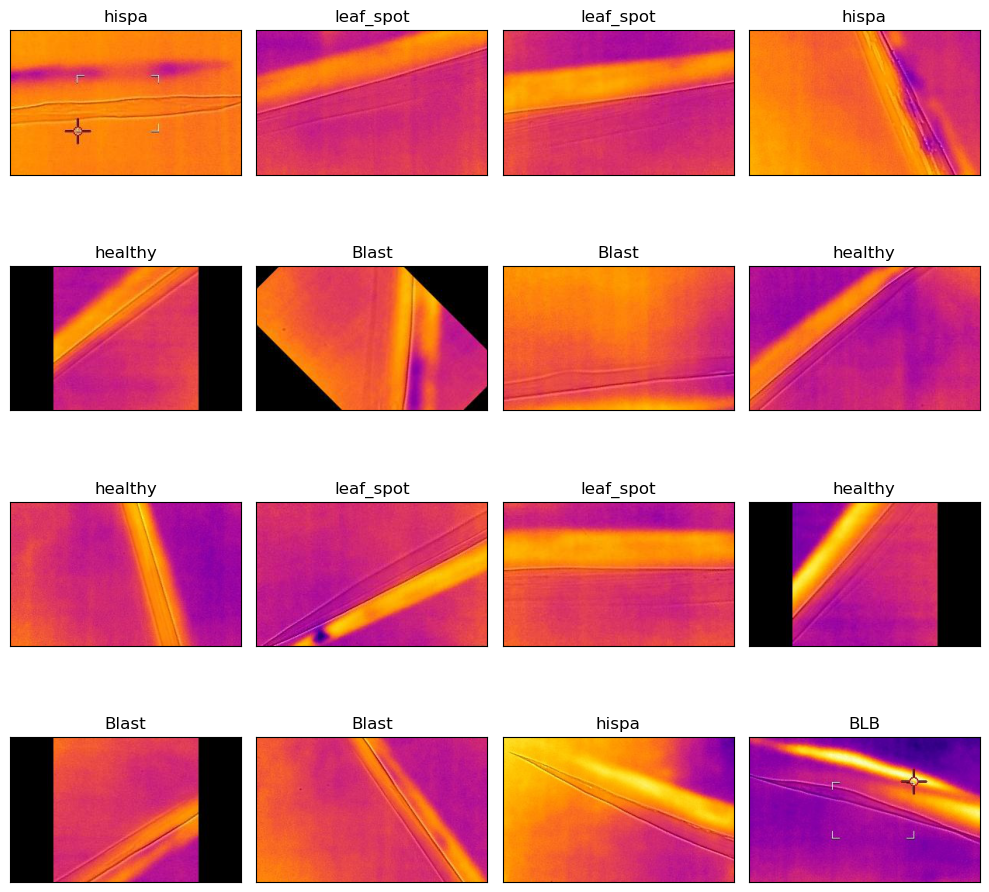

In [61]:
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

In [71]:
def compute_ela_cv(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    SCALE = 15
    orig_img = cv2.imread(path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
    
    cv2.imwrite(temp_filename, orig_img, [cv2.IMWRITE_JPEG_QUALITY, quality])

    # read compressed image
    compressed_img = cv2.imread(temp_filename)

    # get absolute difference between img1 and img2 and multiply by scale
    diff = SCALE * cv2.absdiff(orig_img, compressed_img)
    return diff


def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    ela_filename = 'temp_ela.png'
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1

    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image


def random_sample(path, extension=None):
    if extension:
        items = Path(path).glob(f'*.{extension}')
    else:
        items = Path(path).glob(f'*')
        
    items = list(items)
        
    p = random.choice(items)
    return p.as_posix()

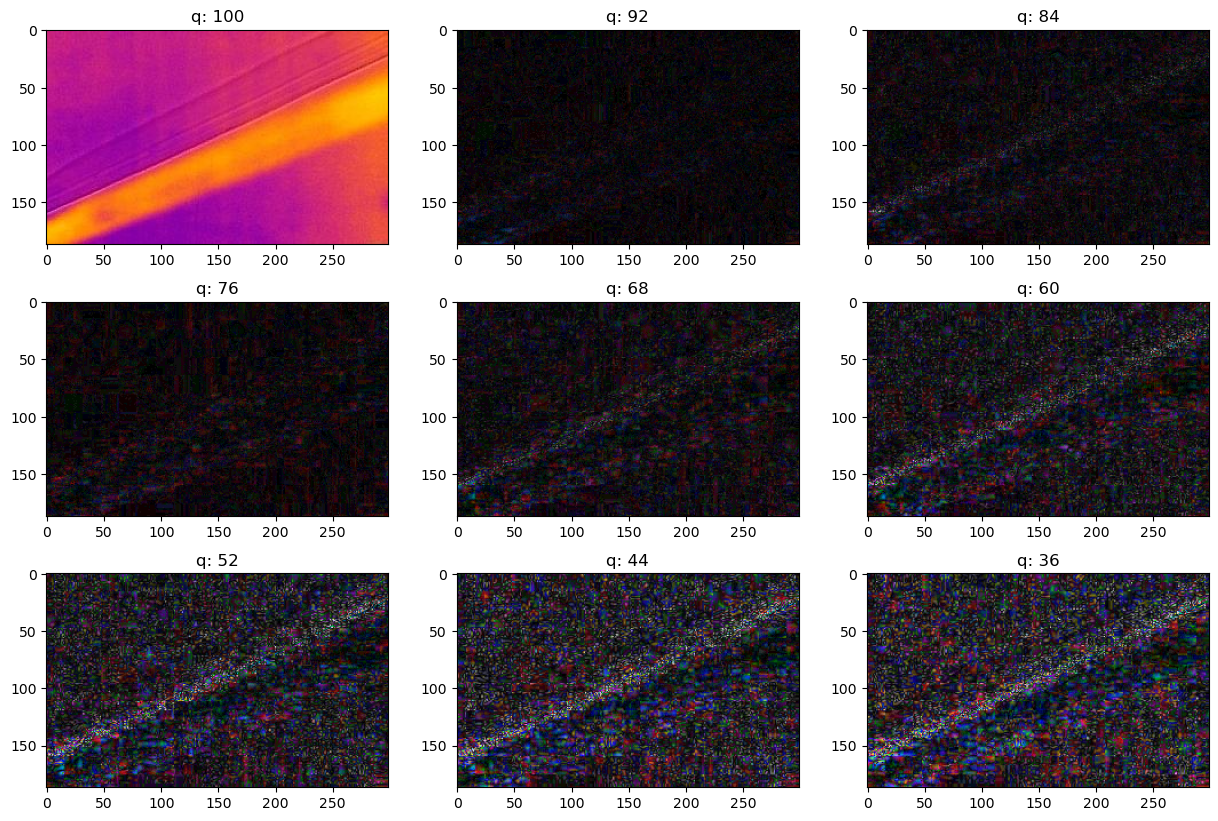

In [77]:
# View random sample from the dataset
p = random_sample('input/plantstressidentification/Dataset/train/leaf_spot')
orig = cv2.imread(p)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 8
    img = compute_ela_cv(path=p, quality=quality)
    if i == 1:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i) 
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)
plt.show()

## Data Preprocessing

In [78]:
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [79]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input
)

In [80]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2816 validated image filenames belonging to 5 classes.
Found 704 validated image filenames belonging to 5 classes.
Found 880 validated image filenames belonging to 5 classes.


In [81]:
# Resize Layer
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.RandomContrast(0.1),
])

In [82]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV3Large(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_model.trainable = False

In [83]:
# Create checkpoint callback
checkpoint_path = "plants_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [84]:
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True)

### Training the Model

In [85]:
inputs = pretrained_model.input
x = resize_and_rescale(inputs)

x = Dense(256, activation='relu')(pretrained_model.output)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)


outputs = Dense(6, activation='softmax')(x)#Original Dense was 5 We have 6 classes

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=Adam(0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=100,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", 
                                    "plant_classification"),
        checkpoint_callback,
    ]
)

Saving TensorBoard log files to: training_logs/plant_classification/20240609-164208


FailedPreconditionError: {{function_node __wrapped__CreateSummaryFileWriter_device_/job:localhost/replica:0/task:0/device:CPU:0}} training_logs is not a directory [Op:CreateSummaryFileWriter] name: 